## Exercise 1: Encodings (3 points)

#### 1.1 (0.5 points)

What are the benefits of having a fixed-width code as opposed to variable-width? e.g. `0011` for `e` and `1111001010` for `Z` (since `e` is much more common than `Z`, this would save some space in variable length encoding).

Imagine that you are given a string in UTF16 (variable-width character encoding). What issues can you encounter? Provide a specific engineering example.

#### 1.2 (1 point)

The ASCII encoding uses 8 bits per single character. The target alphabet in this case is binary: $\{0, 1\}$. Given a text of length $n$, the encoding takes $n\times 8$ bits in memory (without taking alignment into consideration).

- How would you adapt the ASCII encoding if the target alphabet had three symbols $\{0,1,2\}$?
- How many "trits" (number of symbols from  {0,1,2}) would it take to encode $n$ characters in this new system? Be precise in your mathematical explanation, and be careful which way you round and beware of $\pm 1$ errors.
- The UTF32 encoding uses 32 bits per single character. How does your computation change?


#### 1.3 (1.5 points)

Given the following text, construct a [Huffman tree](https://en.wikipedia.org/wiki/Huffman_coding) and encode it (at character level).

- Show the final tree (ideally as a diagram together with frequency counts). You can work it out on a paper and include a photograph.
- Show the encoded sequence (ideally in comparison to ASCII encoded sequence in binary).
- Compare the length to ASCII encoding (n*8 characters). What improvement did you achieve? Could you expect the same amount of improvement on the entirety of Wikipedia?

```
Three thousand three hundred and thirty-three silver syringes.
```

Treat space as a character as well and `t` and `T` as two different characters.

## Exercise 1: Answers

#### 1.1

- In Fixed width Coding we have an advantage of random access, such as if we wish to encode the $n_{th}$ Symbol of the message then we can skip over the required number of bits to get the encoding. For Example if we have a 4 bit Fixed width encoding and we wish to decode the 4th Symbol then we can directly look at 13th bit of the  message.
Whereas if Variable width Coding is used for a text processing, then the message must be scanned from the beginning to determine all the symbols decoding accurately. If applied randoml then we can not guarantee correct decoding of the message. When decoding such message we require to scan ahead to determine the symbol decoding as two or more symbol codes can have same prefix code, but to identify which sequence corresponde to which symbol we must scan ahead.

- UTF16 (variable-width character encoding) can store either 2 bytes or 4 bytes of data in memory as per the length of the word all depending on the Unicode code point. But when we use 16 bits Encoding we have a problem when we store a data, as we can store data as little endian or big endian, for the UTF16 to correctly decode the data the message is usually appended with non character Byte order mark which tell where the data is in Big Endian or Little Endian Format, this requires extra memory. Other was to encode UTF16 is to try decoding by One of the Two if encountered with errors then try the other one. Both these Methods increase the complexity of decoding the message.

Example suppose we have a to encode a Character A --> 1000001

Lets use Hexadecimal Encoding to represent A --> 41

UTF16 with Little Endian A --> 00 41

UTF16 with Big Endian A --> 41 00

Here if we get a Encoded message we will require to know which type is used, which will require either extra memory to store the encoded message else we will have to try both the ways to know which one is correct.

Suppose a message with some Greek Symbols: $A3 03 C8 03 D5 03$

To decode this as we dont know if its BE or LE so we have to try both way

UTF16 BE = ꌃ 젃 !!
error in decoding last bit, so we try the other way

UTF16 LE = Σ ψ ϕ

This is the correct Decoding but we have to try the both way to come to the right Decoding

#### 1.2

- ASCII encoding uses 8 bits per single character to encode 256 chacarcters

When we have 2 Symbols {0, 1}, then using 8 bits we can encode 256 $2^8 = 256$ Characters.

When we have 3 Symbols {0, 1, 2}, then to encode 256 Characters we will need need Ideally 6 bits $3^6 = 729$ it is only way to incorporate 256 Characters. Then given a text of length n , the encoding takes $n * 6$ bits in memory.

- To encode n Characters in this New System we will need at most $log_3{n}$ trits, as each trit = $log_2{3} = 1.585 bits$

- If we use UTF32 encoding, then we will store each character in 32 bits, even if it's binary equivalent of is of 7 bits and then the rest all remaining will be filled with zeros, this will increase the length of the message without providing us any improvement in the encoding or decoding techniques. This will make our computation more complex in time consuming without any advantages.
Suppose we have a Message of 1KB size in ASCII code then using UTF32 we will increase the Message size to 4KB without any additional information.

#### 1.3
```
Three thousand three hundred and thirty-three silver syringes.
```
|Symbol|Frequency|Probability|
| - | - | - |
| e | 9 | $\frac{ 9 }{ 62 }$|
| r | 7 | $\frac{ 7 }{ 62 }$|
|   | 7 | $\frac{ 7 }{ 62 }$|
| h | 6 | $\frac{ 6 }{ 62 }$|
| t | 5 | $\frac{ 5 }{ 62 }$|
| s | 4 | $\frac{ 4 }{ 62 }$|
| n | 4 | $\frac{ 4 }{ 62 }$|
| d | 4 | $\frac{ 4 }{ 62 }$|
| i | 3 | $\frac{ 3 }{ 62 }$|
| u | 2 | $\frac{ 2 }{ 62 }$|
| a | 2 | $\frac{ 2 }{ 62 }$|
| y | 2 | $\frac{ 2 }{ 62 }$|
| T | 1 | $\frac{ 1 }{ 62 }$|
| o | 1 | $\frac{ 1 }{ 62 }$|
| - | 1 | $\frac{ 1 }{ 62 }$|
| l | 1 | $\frac{ 1 }{ 62 }$|
| v | 1 | $\frac{ 1 }{ 62 }$|
| g | 1 | $\frac{ 1 }{ 62 }$|
| . | 1 | $\frac{ 1 }{ 62 }$|

- Huffman Coding Tree (As Explained in the Tutorial)


![Huffman_Tree.jpeg](https://drive.google.com/uc?id=1EuQnxcZ_3HbH8Cr1GETkx2RnRHsPAZwO)

- The encoded sequence
|Symbol|Huffman Encoding|[ASCII Binary 7 bit Code](https://www.google.com/imgres?imgurl=x-raw-image%3A%2F%2F%2Fbc299974a2a4e0c87896435c7ba4bdad83efc6bd5d76473e6be086ee315d9a0f&imgrefurl=https%3A%2F%2Fweb.stanford.edu%2Fclass%2Fcs106a%2Flectures%2F14-TextProcessing%2FStrings-Ethics-2.pdf&tbnid=yOCkonSZKbwwZM&vet=12ahUKEwif1dW02tXwAhXPVCsKHWZaDwsQMygAegUIARCEAQ..i&docid=_OXIKVGvEGl0CM&w=2084&h=1501&q=us%20ascii&ved=2ahUKEwif1dW02tXwAhXPVCsKHWZaDwsQMygAegUIARCEAQ)|
| - | - | - |
| e | 00    | 1100101 |
| r | 010   | 1110010 |
|   | 011   | 0100000 |
| h | 10000 | 1101000 |
| t | 10001 | 1110100 |
| s | 10010 | 1110011 |
| n | 10011 | 1101110 |
| d | 10100 | 1100100 |
| i | 10101 | 1101001 |
| u | 10110 | 1110101 |
| a | 10111 | 1100001 |
| y | 11000 | 1111001 |
| T | 11001 | 1010100 |
| o | 11010 | 1101111 |
| - | 11011 | 0101101 |
| l | 11100 | 1101100 |
| v | 11101 | 1110110 |
| g | 11110 | 1100111 |
| . | 11111 | 0101110 |

Using the Huffman Coding the more frequent Symbol i.e. "e" is assigned only 2 bits and the least frequent Symbols are assigned 5 bits, whereas in the ASCII Binary encoding uses 7 bits for every character. To Encode a text of n length in Huffman Code we will require at an average approximately $5*n$, but for ASCII encoding we will require $7*n$ which increase the complexity. When using Huffman Coding we are saving a lot of memory as we are arranging as per the frequency and then assigning the codes.
$Length\ of\ Huffman\ Code\ <=\ Length\ of\ ASCII\ Binary\ Encoding$

Yes, we can expect the same amount of improvement on the entirety of Wikipedia, as there will be few Symbols with very frequent occurance so we can assign it smaller code whereas as the least frequent Symbols will get comparatively longer code, but even then the length of the longest code will remain less than or in worst case equal to the length of is ASCII Binary Encoding. Using this we will also save a large amount of memory when storing the Encoded word.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## Exercise 2: Conditional Entropy of DNA (7 points)
In this exercise, we will see how conditional entropy is calculated for genome sequences. Read the instructions given below carefully.

### 2.0 Getting started with biopython

1. **Installing biopython** <br/>
Install [biopython](https://biopython.org/) to your local Python environment. Dependencies should be installed automatically. <br/>
The installation instructions for biopython are given in the attached link. A simple pip installation does the trick.
2. **Saving data files**  <br/>
Download the genome of *Drosophila melanogaster* from [kaggle](https://www.kaggle.com/mylesoneill/drosophila-melanogaster-genome?select=genome.fa). For this, you wil need to create an account on kaggle. <br/>
To save the data files you download, create a folder called `data` and save the csv and fasta files directly in this folder, since the same path will be used for retrieving the relevant files, as you can see below in the provided code. Conversely, you can simply rename the `archive` folder as `data`.
3. **How to read a fasta file**  <br/>
As your first task, you have to sample a reduced version of the genome using the pre-implemented `sample_records` function in `exercise_2.py`. The function will write the reduced genome to a [fasta](https://en.wikipedia.org/wiki/FASTA_format) file. <br/>
Biopython can be imported in your Python file with the statement `import Bio`.
For reading fasta files, look up how to utilise biopython's SeqIO module for parsing the file structure to read genome information in the form of sequences. The result should be akin to reading a list of sentences from a text file. Check the `sample_records` function for further guidance.
4. **Understanding genome sequences** <br/>
Parsing the fasta file results in an [iterator](https://wiki.python.org/moin/Iterator) of sequence records for the genomes in a class called SeqRecord. <br/>
Structure: *SeqRecord* <br/>
Elements: <br/>
o Meta-features of the sequence (*Name*, *Id*, *Description*, *Number of features*) <br/>
o The actual sequence of nucleotides (*Seq*) <br/>
These sequences comprise chains formed of the same basic building blocks - the nucleotides A, G, C, T. You will observe that these sequences are case sensitive i.e. they contain both uppercase and lowercase chains. We will explicitly tell you what they mean and how to handle them over the course of this exercise. <br/>
5. **Processing genome sequences** <br/>
We can deal with the obtained sequences as if they were normal Python strings. Your goal is to first combine all these sequences into a continuous string of nucleotides, and then extract k-mers from this final "text" corpus.
5. **Difference between k-mers and n-grams** <br/>
For all intents and purposes, k-mers are to genome sequences what n-grams are to word sequences.

In [ ]:
# 2.0 Sample a reduced version of the genome
from importlib import reload
from pathlib import Path

import sys
sys.path.append('/content/exercise_2.py')
!pip install biopython

import exercise_2
exercise_2 = reload(exercise_2)

N = 100

genome_loc = Path("data/genome.fa")
genome_red_loc = Path("data/genome_reduced.fa")

exercise_2.sample_records(genome_loc, genome_red_loc, N)

### 2.1: K-mers (0.5 points)

[k-mers](https://en.wikipedia.org/wiki/K-mer) are sequences of nucleotides of length $k$. You can see them as the DNA variant of n-grams, only with nucleotides as its "words".

Implement the function `get_k_mers` that assembles sequences of nucleotides from the fasta file produced in 2.0. For now, convert all characters to uppercase.

e. g. for a sequence
```
GTAGAGCTGT
```
The 2-mers to be sampled are, just as in a bigram language model:
```
GT, TA, AG, GA, AG, GC, CT, TG, GT
```
This example is taken from the Wikipedia article, see there for higher $k$.

Now, show the output of the function for $k = 2$, i. e. all 2-mers.

In [ ]:
# 2.1 get k-mers
k_mers = exercise_2.get_k_mers(genome_red_loc, 2)
print(k_mers)

['AG', 'GC', 'CT', 'TG', 'GT', 'TG', 'GC', 'CT', 'TA', 'AG', 'GA', 'AG', 'GG', 'GA', 'AA', 'AA', 'AA', 'AA', 'AG', 'GG', 'GA', 'AG', 'GC', 'CG', 'GC', 'CA', 'AA', 'AC', 'CT', 'TA', 'AA', 'AT', 'TG', 'GT', 'TC', 'CC', 'CA', 'AT', 'TC', 'CG', 'GT', 'TA', 'AG', 'GA', 'AA', 'AA', 'AC', 'CG', 'GT', 'TG', 'GG', 'GG', 'GG', 'GA', 'AG', 'GC', 'CG', 'GG', 'GA', 'AA', 'AG', 'GT', 'TT', 'TG', 'GG', 'GC', 'CG', 'GT', 'TT', 'TG', 'GC', 'CC', 'CC', 'CG', 'GT', 'TC', 'CT', 'TC', 'CG', 'GA', 'AC', 'CC', 'CA', 'AG', 'GC', 'CA', 'AA', 'AG', 'GA', 'AC', 'CG', 'GG', 'GT', 'TA', 'AA', 'AT', 'TC', 'CA', 'AT', 'TG', 'GC', 'CT', 'TG', 'GC', 'CT', 'TG', 'GA', 'AA', 'AA', 'AG', 'GG', 'GT', 'TG', 'GC', 'CC', 'CT', 'TT', 'TG', 'GA', 'AG', 'GA', 'AC', 'CG', 'GT', 'TG', 'GC', 'CG', 'GC', 'CC', 'CT', 'TA', 'AC', 'CG', 'GG', 'GT', 'TG', 'GA', 'AG', 'GG', 'GT', 'TT', 'TT', 'TG', 'GC', 'CT', 'TG', 'GG', 'GA', 'AG', 'GC', 'CG', 'GA', 'AA', 'AC', 'CC', 'CT', 'TT', 'TC', 'CC', 'CG', 'GT', 'TA', 'AT', 'TG', 'GT', 'TG', 'GC

### 2.2 K-mer language models (3 points)

*  Implement the function `k_mer_statistics`. It should estimate $K$ language models with k-mer sizes $1,...,K$, and return two probability distributions: <br/>
a) relative k-mer frequencies and <br/>
b) conditional k-mer probabilities. <br/>
As always, you may modify the function signature to suit your needs (but you must comment on the changes you make). (2.5 points) <br/>

 **Hint:** Calculate the relative frequencies up to K, and then use these for calculating the $k^{th}$ level conditional probabilities using the $(k-1)^{th}$ level relative frequencies. (Refer to the formulae you obtained in Assignment 2 Ex. 2.1)
* Plot the probabilites of all k-mers for $K=5$ language models vs their rank, and use the log-log scale on the axes. Do so by implementing the function `plot_k_mers`. Does the curve look similar to the one you obtained for natural language? (0.5 points)

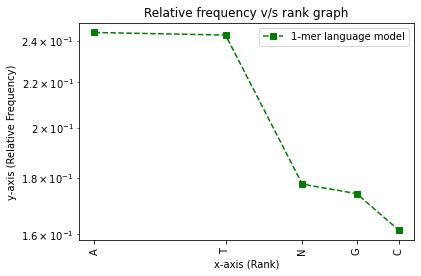

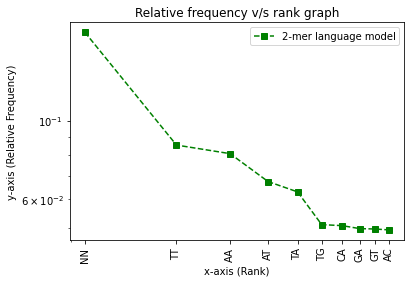

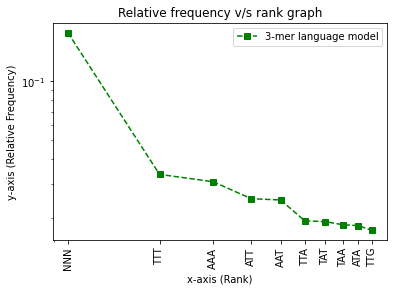

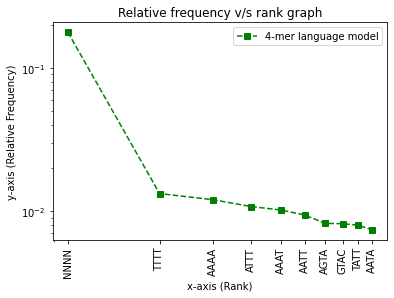

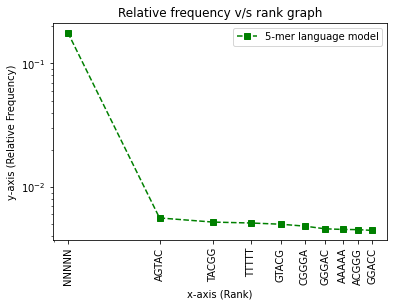

In [ ]:
# 2.2 k-mer statistics

rel_freqs, cond_probs = exercise_2.k_mer_statistics(genome_red_loc, K=5)

# plot
exercise_2.plot_k_mers(rel_freqs)

### 2.3 Conditional entropy (1.5 point)
We want to observe how the conditional entropy of our small DNA corpus changes with increasing k-mer size. Conditional Entropy is defined as

\begin{equation}
H(W|H) = - \sum_{i} p(w_i,h_i) \cdot \log_2p(w_i|h_i)
\end{equation}

Where $p(w_i,h_i)$ is the relative frequency of $(w_i, h_i)$ and $p(w_i|h_i)$ is the conditional probability of $w_i$ given the history $h_i$.  

* What do $w_i$, $h_i$ and the probabilities derived from them correspond to in the context of DNA? (0.5 Points)

* Using your insights from above, implement the function `conditional_entropy`, that calculates the conditional entropy of a k-mer language model. You may modify the function signature as you wish. (0.5 points)

* Estimate up to $K=20$ k-mer language models, calculate their conditional entropies and plot by ascending $k$. What do you observe? (0.5 points)

1-mer cond. entropy is 2.2990529646951856
2-mer cond. entropy is 1.620190153722624
3-mer cond. entropy is 1.6061703062766828
4-mer cond. entropy is 1.5762804572591
5-mer cond. entropy is 1.5422072078631945
6-mer cond. entropy is 1.5015774264736506
7-mer cond. entropy is 1.4336934376002766
8-mer cond. entropy is 1.263497603147919
9-mer cond. entropy is 0.8714025142453717
10-mer cond. entropy is 0.4488131791386824
11-mer cond. entropy is 0.20729273719210328
12-mer cond. entropy is 0.10370276527651719
13-mer cond. entropy is 0.06334342985428065
14-mer cond. entropy is 0.04897910080024154
15-mer cond. entropy is 0.042421672211044356
16-mer cond. entropy is 0.03869047894905932
17-mer cond. entropy is 0.03579778132915946
18-mer cond. entropy is 0.033240595997006996
19-mer cond. entropy is 0.03116319266318911
20-mer cond. entropy is 0.029279528551396025


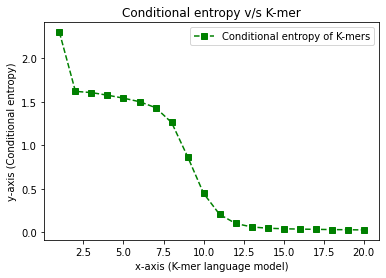

In [ ]:
# 2.3 conditional entropy
K = 20

H_ks = []

rel_freqs, cond_probs = exercise_2.k_mer_statistics(genome_red_loc, K=20)

for k in range(K):
  H_k = exercise_2.conditional_entropy(rel_freqs[k], cond_probs[k])
  print("{}-mer cond. entropy is {}".format(k+1, H_k))
  H_ks.append(H_k)

# plot
exercise_2.plot_conditional_entropies(H_ks)

### 2.4 Tandem repeats (2 points)

A [tandem repeat](https://en.wikipedia.org/wiki/Tandem_repeat) or a mini/microsattelite is a sequence of nucleotides that is repeated multiple times, and the repetitions are immediately adjacent. This example is again taken from the Wikipedia article:

```
ATTCG ATTCG ATTCG
```

In the *Drosophila Melanogaster* genome, tandem repeats are represented by lowercase letters, while the non-repeating sequences are in uppercase. Up to 2.3, we ignored tandem repeats and considered all sequences in uppercase.

* Read up about tandem repeats, and tell what your expectations about the conditional entropy of tandem repeat regions are as opposed to non-tandem repeat regions (0.5 points)

* Implement the functions `get_k_mers_24` and `k_mer_statistics_24` and sample the same language models as in 2.2, but this time exclusively on tandem repeats or non-tandem repeats. This should yield two sets of language models $LM_{TR}$ and $LM_{\neg TR}$. (1 point)

* Calculate the conditional entropies of both $LM_{TR}$ and $LM_{\neg TR}$. Plot the conditional entropies vs. increasing $K$ as in 2.3. Do you observe any difference? Does it follow your expectation from above? (0.5 points)

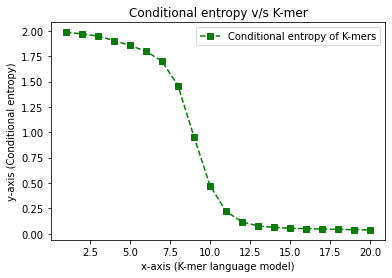

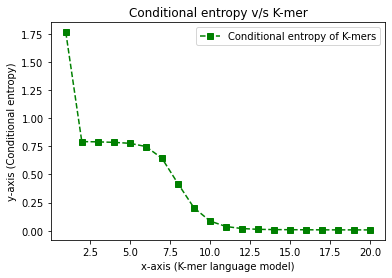

In [ ]:
# 2.4.1 tandem repeats
H_ks = []

rel_freqs, cond_probs = exercise_2.k_mer_statistics_24(genome_red_loc, K, tandem_repeats=True)

for k in range(K):
  H_k = exercise_2.conditional_entropy(rel_freqs[k], cond_probs[k])
  H_ks.append(H_k)

# plot
exercise_2.plot_conditional_entropies(H_ks)

# 2.4.2 non tandem repeats
H_ks = []

rel_freqs, cond_probs = exercise_2.k_mer_statistics_24(genome_red_loc, K, tandem_repeats=False)

for k in range(K):
  H_k = exercise_2.conditional_entropy(rel_freqs[k], cond_probs[k])
  H_ks.append(H_k)

# plot
exercise_2.plot_conditional_entropies(H_ks)

## Exercise 2: Answers

#### 2.2

Yes, curve looks similar to natural language.

#### 2.3



*   $w$ refers to the sequence and $h$ refers to the history of sequence. Probabilites dervied from them indicate about the chances of occuring of a sequence after the given history.
*   When we plot conditional entropies by ascending k, then we can observe that conditional entropy decreases with increase in value of k. This means there is no long range dependency with large k values due to repeating sequences.

#### 2.4



*   We can expect that conditional entropy of tandem repeat region will become zero after the certain period because it has repeated sequence but same cannot be said for tandem non repeating region as there is no information about sequences.
*   Conditional entropy graph for tandem repeats slowly drops to constant value while graph for non tandem repeats has sudden initial fall then slow fall to zero value. But in both graphs, conditinal entropy becomes equal to a zero value for larger k values. Our expectation holds true for tandem repeating region but false in case of tandem non repeating region.






## Bonus (1.5 points)

The standard Huffman encoding uses a binary target alphabet $\{0,1\}$. Assume that you're given a text in alphabet $\Sigma$ and you compress one input symbol from the alphabet at a time.

- Could you adapt the algorithm so that it utilizes three output symbols $\{0,1,2\}$?
- What about $k$ target symbols ($k < $ alphabet size)?
-  What would happen if you used $\Sigma$ as the output alphabet for Huffman encoding? Would the text remain the same? Would it have the same length?
- What changes if the input is words (i.e. sequences from the $\Sigma$ alphabet with one symbol representing the word boundary)?
- What changes if you are allowed to use phrases (i.e. ignore the word boundary) if it helps compression?

Answer these questions in 1-2 sentences max.

## Bonus : Answers

The standard Huffman encoding uses a binary target alphabet $\{0,1\}$. Assume that you're given a text in alphabet $\Sigma$ and you compress one input symbol from the alphabet at a time.

- No, We will have to reconstruct the complete Huffman Tree, this time by using the new symbols. If we use 3 Symbols then we will have to make groups of 3 when combining frequencies (Sorted in Descending Order). When naming the Tree edges name them 0 on right, 1 on middle and 2 on the right.

- If we have k target Symbols then we can accordingly form groups of k symbols from the right and, the names of the edges will be left to right as per the k Symbols we have.

- If we use $\Sigma$ as the Symbols for Huffman Encoding, then we will have 1 root leading to multiple branches, where each edge will have have the symbols for the set of symbols in $\Sigma$.

Yes, the text would remain the same as we will be using all the symbols of the text as the target symbols of Huffman encoding.

Yes, The length will also remain the same as all the symbols in the will be represented using exactly one target Symbol from Huffman encoding.

- If we use Word as input then the length of the encoding compresses, as we will have to use lesser Symbols, but we will have to transmit a larger amount of data where the length of the encoded message will be comparetively shorter than the information about the Huffman Tree.

- If we use Phrases as input then the length of the encoding compresses, as we will have to use lesser Symbols, but we will have to transmit a even larger amount of data where the length of the encoded message will be comparetively shorter than the information about the Huffman Tree. It will only provide compression on the encoded message.